### Choose a dataset to Visulaize
* Import needed libraries 
* Load your own dataset

In [150]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

%matplotlib inline

df = pd.read_csv('House Demolitions in Palestine.csv')


### Descriptive Analysis
* Write the codes for summarizing the dataset (head, tail, shape, describe, info, etc).
* Write your findings of the summarizations (write at least 10 findings).

In [151]:
df.head()

,Year,Housing Units,People Left Homeless,Minors Left Homeless,Area,Type of Structure,Demolish Scope,District,Demolition Reason,Demolition carried out by
0,2021.0,8,31,14,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Al-Quds,Demolition on the pretext of unlawful construc...,NaN
1,2021.0,3,5,1,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Bethlehem,Demolition on the pretext of unlawful construc...,NaN
2,2021.0,7,18,12,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Hebron,Demolition on the pretext of unlawful construc...,NaN
3,2021.0,1,0,0,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jenin,Demolition on the pretext of unlawful construc...,NaN
4,2021.0,16,78,33,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jericho,Demolition on the pretext of unlawful construc...,NaN


In [152]:
df.tail()

,Year,Housing Units,People Left Homeless,Minors Left Homeless,Area,Type of Structure,Demolish Scope,District,Demolition Reason,Demolition carried out by
267,2004.0,4,20,0,Gaza Strip,Residential Structure,Complete Demolition,Noth Gaza,Demolition of houses as punishment,NaN
268,2004.0,8,66,0,Gaza Strip,Residential Structure,Complete Demolition,Rafah,Demolition of houses as punishment,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,NaN,"5,498","25,730","5,998",NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
df.describe(exclude='number')

,Housing Units,People Left Homeless,Minors Left Homeless,Area,Type of Structure,Demolish Scope,District,Demolition Reason,Demolition carried out by
count,270,270,269,269,269,97,269,269,52
unique,62,117,78,3,2,2,21,3,2
top,1,0,0,The West Bank (Excluding East Jerusalem),Residential Structure,Complete Demolition,East Jerusalem,Demolition on the pretext of unlawful construc...,Authorities
freq,38,45,90,182,247,89,58,172,28


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       269 non-null    float64
 1   Housing Units              270 non-null    object 
 2   People Left Homeless       270 non-null    object 
 3   Minors Left Homeless       269 non-null    object 
 4   Area                       269 non-null    object 
 5   Type of Structure          269 non-null    object 
 6   Demolish Scope             97 non-null     object 
 7   District                   269 non-null    object 
 8   Demolition Reason          269 non-null    object 
 9   Demolition carried out by  52 non-null     object 
dtypes: float64(1), object(9)
memory usage: 21.4+ KB


In [155]:
t = df['Demolition Reason'].value_counts().reset_index()

In [156]:
# Cleaning 
df = pd.read_csv('House Demolitions in Palestine.csv')

df['District'] = df['District'].str.replace('Noth Gaza', 'North Gaza')
df.dropna(subset=['Year'], inplace=True)

df['Minors Left Homeless'].fillna('0', inplace=True)
df['Demolition carried out by'].fillna('Unknown', inplace=True)
df['Demolish Scope'].fillna('Unknown', inplace=True)

df.isna().sum()

df["People Left Homeless"] = df["People Left Homeless"].map(lambda x: x.replace(",", ""))

df['Year'] = df['Year'].astype(int)
df['Year'] = df['Year'].astype(str)
df['Housing Units'] = df['Housing Units'].astype(int)
df['People Left Homeless'] = df['People Left Homeless'].astype(int)
df['Minors Left Homeless'] = df['Minors Left Homeless'].astype(int)


In [157]:
from ydata_profiling import ProfileReport
from ipywidgets import widgets
from IPython.display import display

report = ProfileReport(df)
report = ProfileReport(df, minimal=True)
report.to_file(output_file="output.html")
report.to_widgets()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

**Insights**

- Before cleaning:
1. The data time scope is from 2004 to 2121.
2. Dataset has 10 variables and 272 observations.
3. Some data types are object(str) when they should be numeric(int) or the other way around.
4. Datasets has 15.3% missing values.
5. *Demolition carried out by* column has 220 (80.9%) missing values and *Demolish Scope* Demolish Scope has 175 (64.3%) missing values
6. 3 observations are almost completely null and have noise. 

- After cleaning:
7. The year 2004 has seen the highest number of demolitions.
8. More demolitions were carried out in *East Jerusalem* than any other area.
9. Most given demolition reason was *Demolition on the pretext of unlawful construction*.
10. Average housing units demolished in one operation is 20.43 units.

### Univariate Visualization
* Plot two Charts
* Provide each charts with at least two insights 

In [158]:
fig = px.pie(df, names='Area', title='Demolitions per area')
fig.show()

fig = px.bar(df, x='Year', barmode='group', title='Demolitions per year')
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Count')
fig.show()


#### Write your insghts here

1. *Gaza* faced the least amount of demolition operations.
2. More demolitions were carried out in *East Jerusalem* than any other area.

#### Write your insghts here

1. The year 2004 has seen the highest number of demolitions.
2. The year 2009 has seen the lowest number of demolitions.

### Bivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

In [159]:
fig = px.bar(df, x='Year', y='Housing Units', title='Houses demolished per year')
fig.update_xaxes(title='Housing Units')
fig.update_yaxes(title='Count')
fig.show()

fig = px.bar(df, x='District', y='People Left Homeless', title='Number of people left homeless per district')
fig.update_xaxes(title='District')
fig.update_yaxes(title='People Left Homeless')
fig.show()

#### Write your insghts here

1. More than 1500 housing units were demolished in 2004 alone. 
2. The biggest demolition operation was in 2004 with 756 houses destroyed.

#### Write your insghts here

1. More people were left homeless in Rafah than any other district.
2. 6325 people were left homeless in the biggest demolition operation.

### Multivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

<Axes: xlabel='Year', ylabel='Housing Units'>

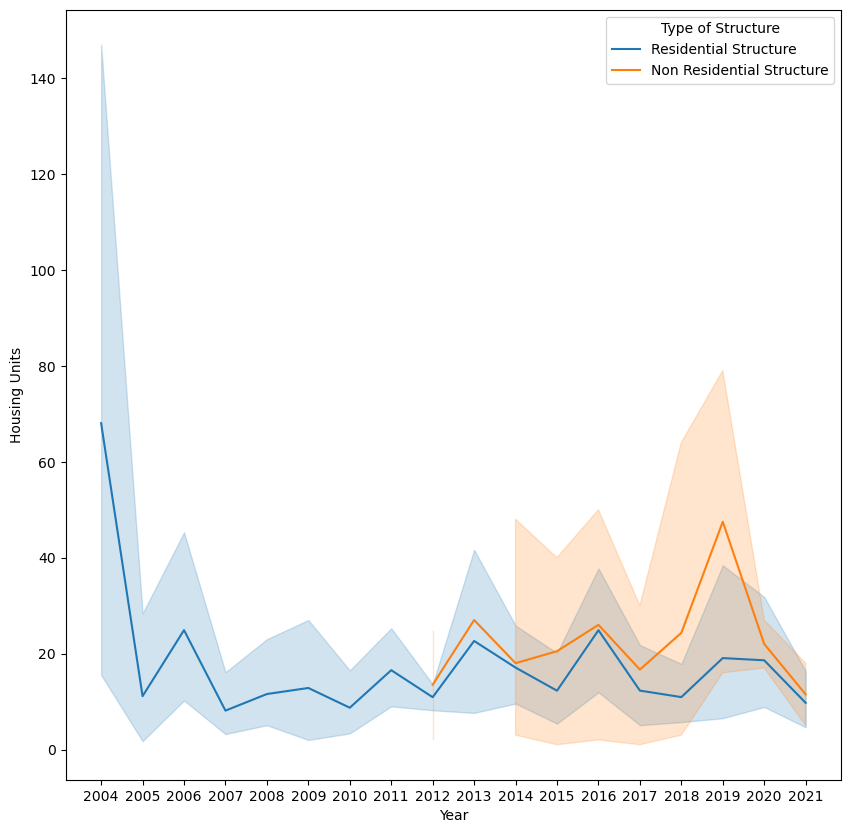

In [173]:
df = df.sort_values(by='Year')
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x='Year', y='Housing Units',hue='Type of Structure')

#### Write your insghts here

1. 
2. 

#### Write your insghts here

1. 
2. 